In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train_ID = train['Id']
test_ID = test['Id']
train.drop('Id', axis = 1, inplace = True)
test.drop('Id',axis=1,inplace=True)

In [3]:
print(train.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

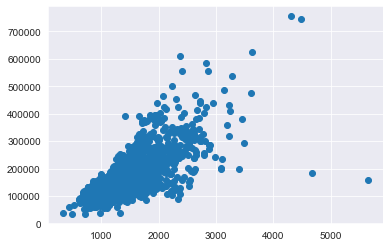

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.show()

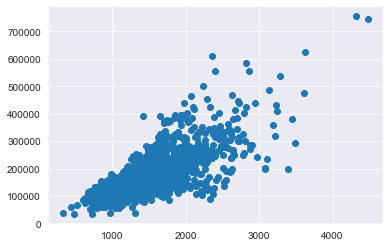

In [5]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.show()

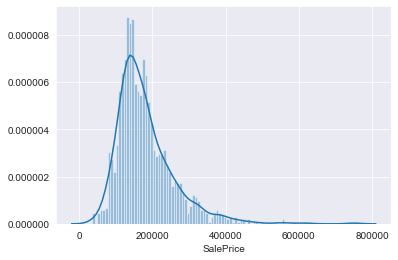

In [6]:
sns.distplot(train['SalePrice'],bins=100)

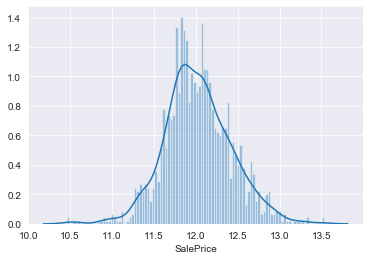

In [7]:
#Nomalization of target variable
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],bins=100)

In [8]:
all_data = pd.concat((train, test)).reset_index(drop=True)
print(all_data.shape)

(2917, 80)


c:\users\btm\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
#Percentage of missing Values
na = (all_data.isnull().sum()/len(all_data))*100
print(na.drop(na[na == 0].index))
all_data.shape

Alley           93.212204
BsmtCond         2.811107
BsmtExposure     2.811107
BsmtFinSF1       0.034282
BsmtFinSF2       0.034282
BsmtFinType1     2.708262
BsmtFinType2     2.742544
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
BsmtQual         2.776826
BsmtUnfSF        0.034282
Electrical       0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
Fence           80.425094
FireplaceQu     48.680151
Functional       0.068564
GarageArea       0.034282
GarageCars       0.034282
GarageCond       5.450806
GarageFinish     5.450806
GarageQual       5.450806
GarageType       5.382242
GarageYrBlt      5.450806
KitchenQual      0.034282
LotFrontage     16.660953
MSZoning         0.137127
MasVnrArea       0.788481
MasVnrType       0.822763
MiscFeature     96.400411
PoolQC          99.691464
SalePrice       50.017141
SaleType         0.034282
TotalBsmtSF      0.034282
Utilities        0.068564
dtype: float64


(2917, 80)

In [10]:
# f, ax = plt.subplots(figsize=(15, 12))
# plt.xticks(rotation='90')
# sns.barplot(x=na.index, y=na)

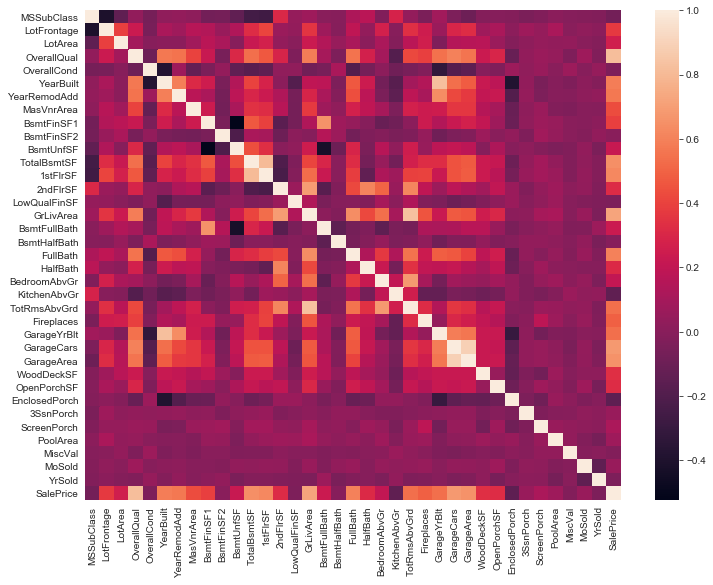

In [11]:
plt.subplots(figsize=(12,9))
sns.heatmap(train.corr())

In [12]:
#Imputing null values
l = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MSSubClass']
l2 = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
      'BsmtHalfBath','MasVnrArea']
for col in l:
    all_data[col] = all_data[col].fillna("None")
for col in l2:
    all_data[col] = all_data[col].fillna(0)
    
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))



In [13]:
#Imputing null values
# all_data['MSZoning'].mode()
l = ['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType']
for col in l:
    all_data[col] = all_data[col].fillna(all_data['MSZoning'].mode()[0])
# all_data = all_data.drop(all_data[(all_data['Utilities'].isnull())].index)
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [15]:
#Transforming some numerical variables that are really categorical
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,12.247699,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,12.109016,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,12.317171,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,11.849405,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,12.429220,WD,0,Pave,9,1145.0,192,2000,2000,2008


In [16]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    le = LabelEncoder()
    le.fit(list(all_data[c].values))
    all_data[c] = le.transform(list(all_data[c].values))

In [17]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [18]:
temp = all_data.drop('SalePrice',axis=1)
numeric_fea =  temp.dtypes[temp.dtypes != 'object'].index
skewed_fea = all_data[numeric_fea].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_fea})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [19]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
all_data.shape

There are 59 skewed numerical features to Box Cox transform


(2917, 80)

In [20]:
all_data = pd.get_dummies(all_data,drop_first=True)
print(all_data.shape)

(2917, 205)


In [22]:
# from sklearn.model_selection import train_test_split
# X = all_data.drop(['SalePrice'],axis=1)
# y = all_data['SalePrice']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
train = all_data[:ntrain]
test = all_data[ntrain:]

In [24]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb

In [ ]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

In [25]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [26]:
lassoreg = Lasso(alpha=0.0005 ,normalize=True, max_iter=1e5)
lassoreg.fit(train.values, y_train)
y_pred = lassoreg.predict(train.values)
lassoScore = np.sqrt(mean_squared_error(y_train, y_pred))
print(np.sqrt(mean_squared_error(y_train, y_pred)))

0.01909188309203647


In [27]:
# def rmsle(y, y_pred):
#     return np.sqrt(mean_squared_error(y, y_pred))
# model_xgb.fit(train, y_train)
# xgb_train_pred = model_xgb.predict(train)
# xgb_pred = np.expm1(model_xgb.predict(test))
# print(rmsle(y_train, xgb_train_pred))

In [28]:
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [29]:
# model_lgb.fit(train, y_train)
# lgb_train_pred = model_lgb.predict(train)
# lgb_pred = np.expm1(model_lgb.predict(test.values))
# scoreLgm = rmsle(y_train, lgb_train_pred)
# print(rmsle(y_train, lgb_train_pred))

In [30]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.8f} ({:.8f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.03581068 (0.00280796)



In [31]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [32]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.8f} ({:.8f})\n".format(score.mean(), score.std()))


Lasso score: 0.00066168 (0.00003228)



In [ ]:
# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['SalePrice'] = lassoScore
# sub.to_csv('submission.csv',index=False)